# PERBANDINGAN JAM KELEMBABAN(RH)
## Januari 2023

In [1]:
import pandas as dp
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#File Synoptik dan AWS
df = dp.read_csv('C:/Users/Acer/Documents/KelembapanSynop1.csv')
df = df.drop(df.index[-3:])
dft = dp.read_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [2]:
#UJI T
def ujiT(synop):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['rh_avg'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['rh_avg'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [3]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['rh_avg'] = df_cleaned_4['rh_avg'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['rh_avg'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [4]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Jam 00

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.2399394249420146
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.2198253270479853
p-value for one tailed: 0.10991266352399265
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


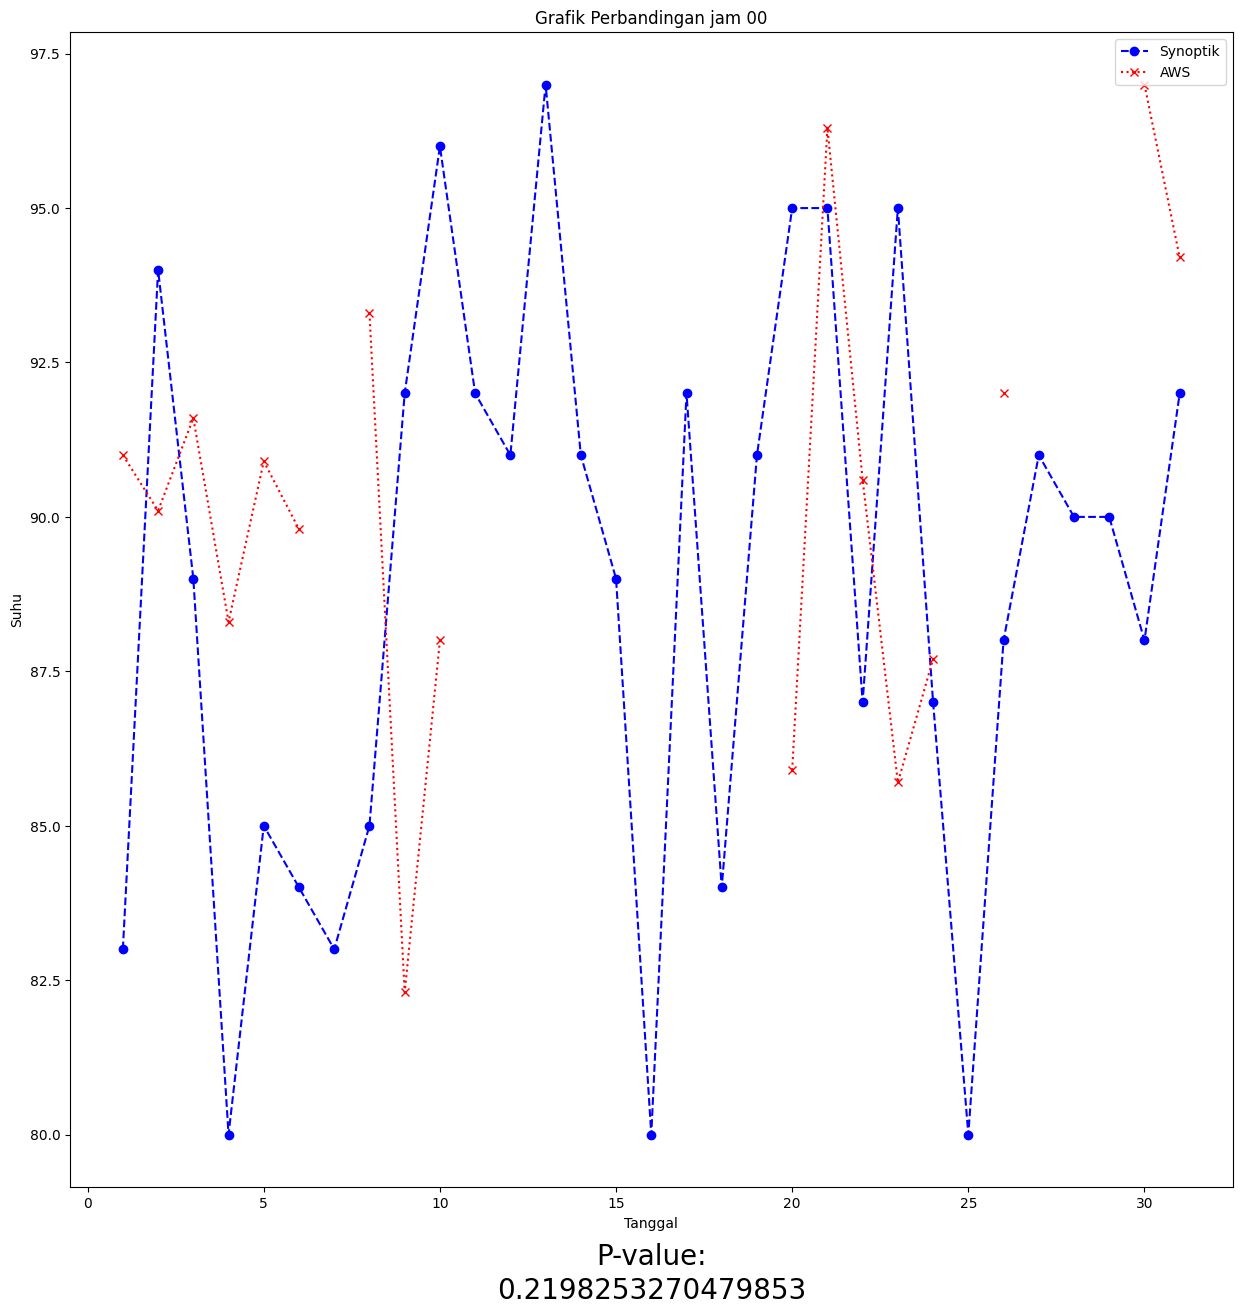

In [5]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['0']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='0', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['0'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('0')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['0']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='0', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['0'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('0')
    else:
      print("Dilakukan Uji T")
      ujiT('0')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('0')
    else:
      print("Dilakukan Uji T")
      ujiT('0')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 00')
plt.plot(df2_4['Tgl'], df2_4['0'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 1

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 5.778420268885144
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 2.8714052557887726e-07
p-value for one tailed: 1.4357026278943863e-07
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


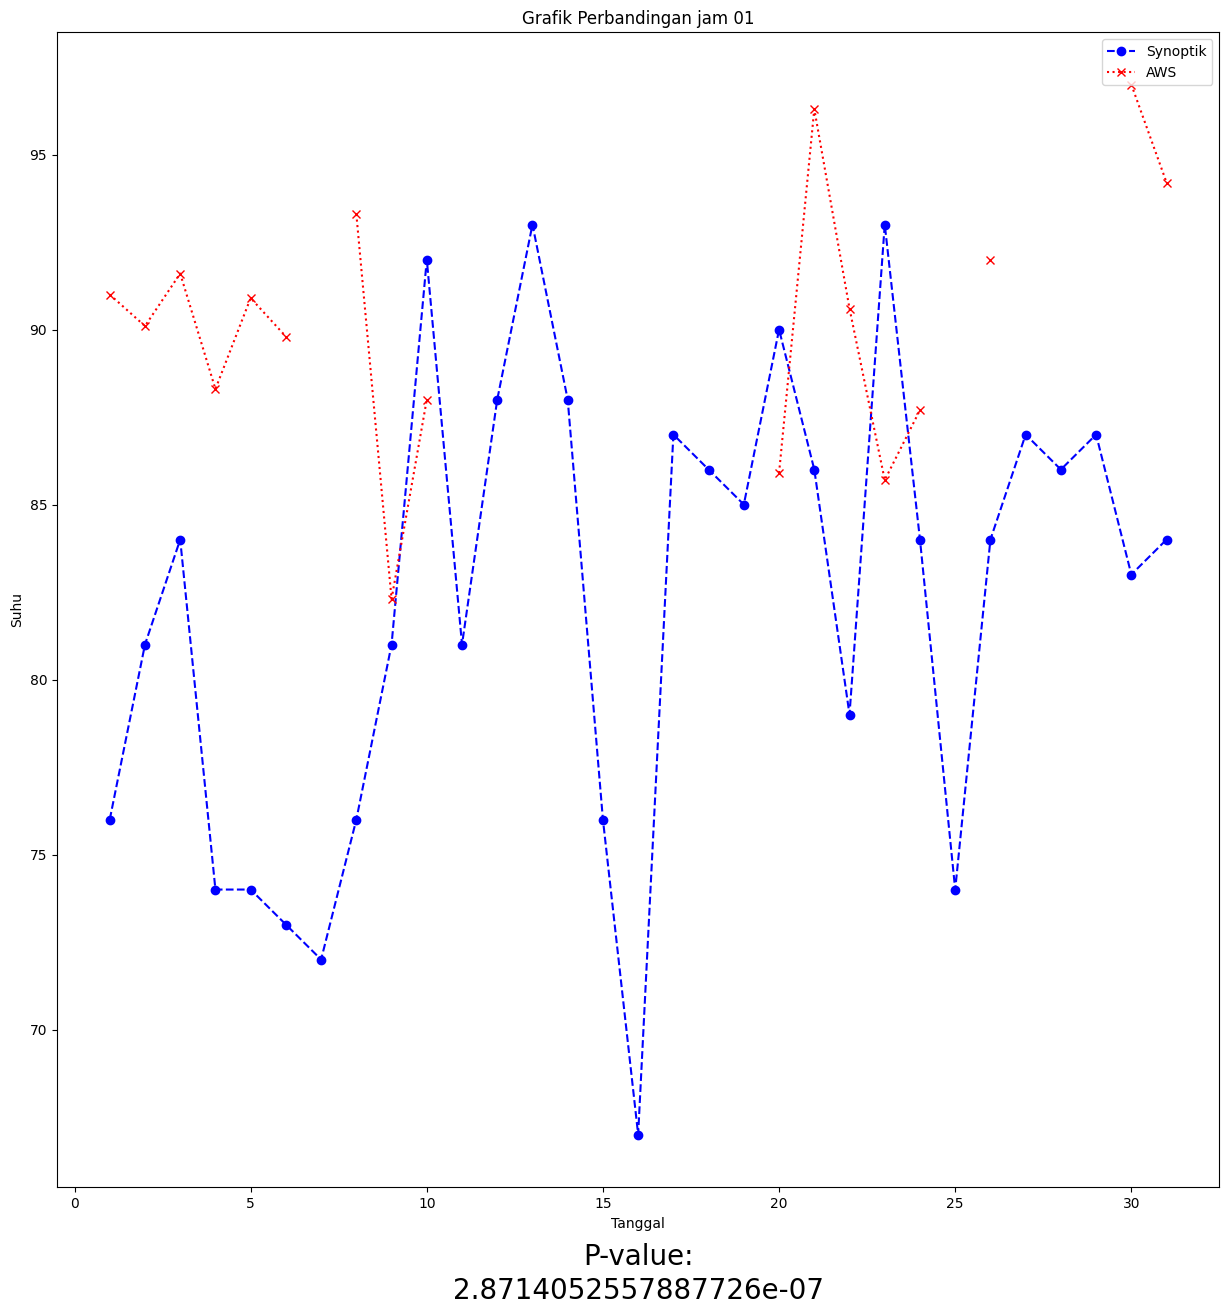

In [6]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['1']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='1', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('1')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['1']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='1', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('1')
    else:
      print("Dilakukan Uji T")
      ujiT('1')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('1')
    else:
      print("Dilakukan Uji T")
      ujiT('1')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 01')
plt.plot(df2_4['Tgl'], df2_4['1'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 2

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 9.643978473423878
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 8.282263763703668e-14
p-value for one tailed: 4.141131881851834e-14
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


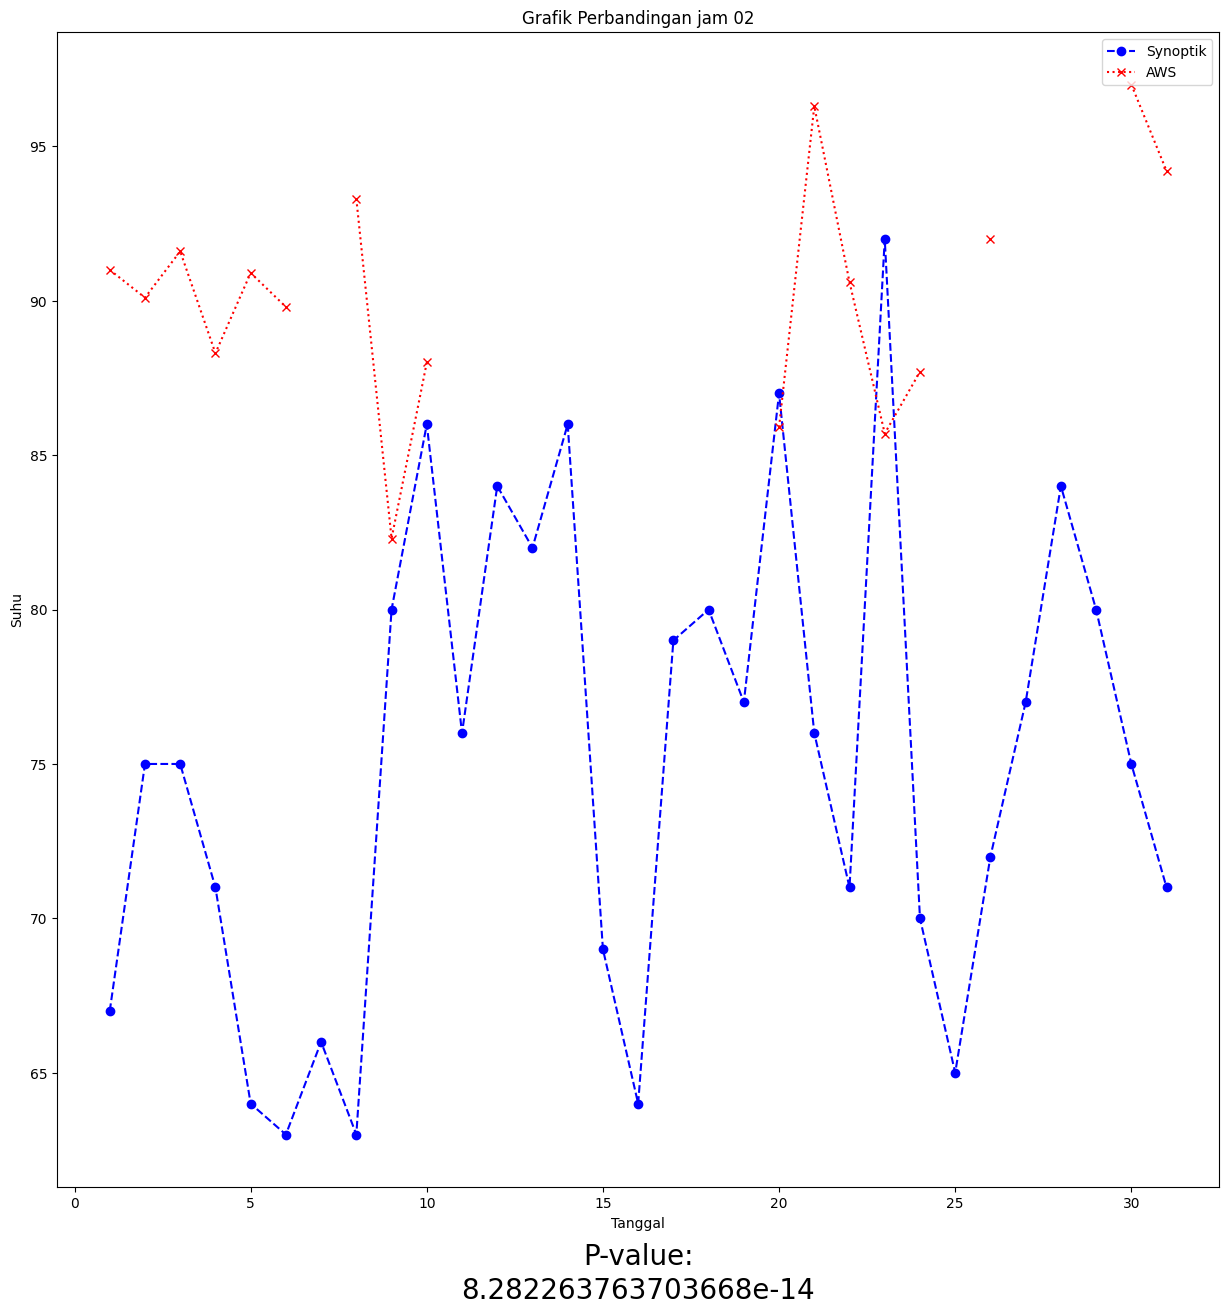

In [7]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['2']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='2', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('2')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['2']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='2', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('2')
    else:
      print("Dilakukan Uji T")
      ujiT('2')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('2')
    else:
      print("Dilakukan Uji T")
      ujiT('2')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 02')
plt.plot(df2_4['Tgl'], df2_4['2'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 3

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 14.258975188004737
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


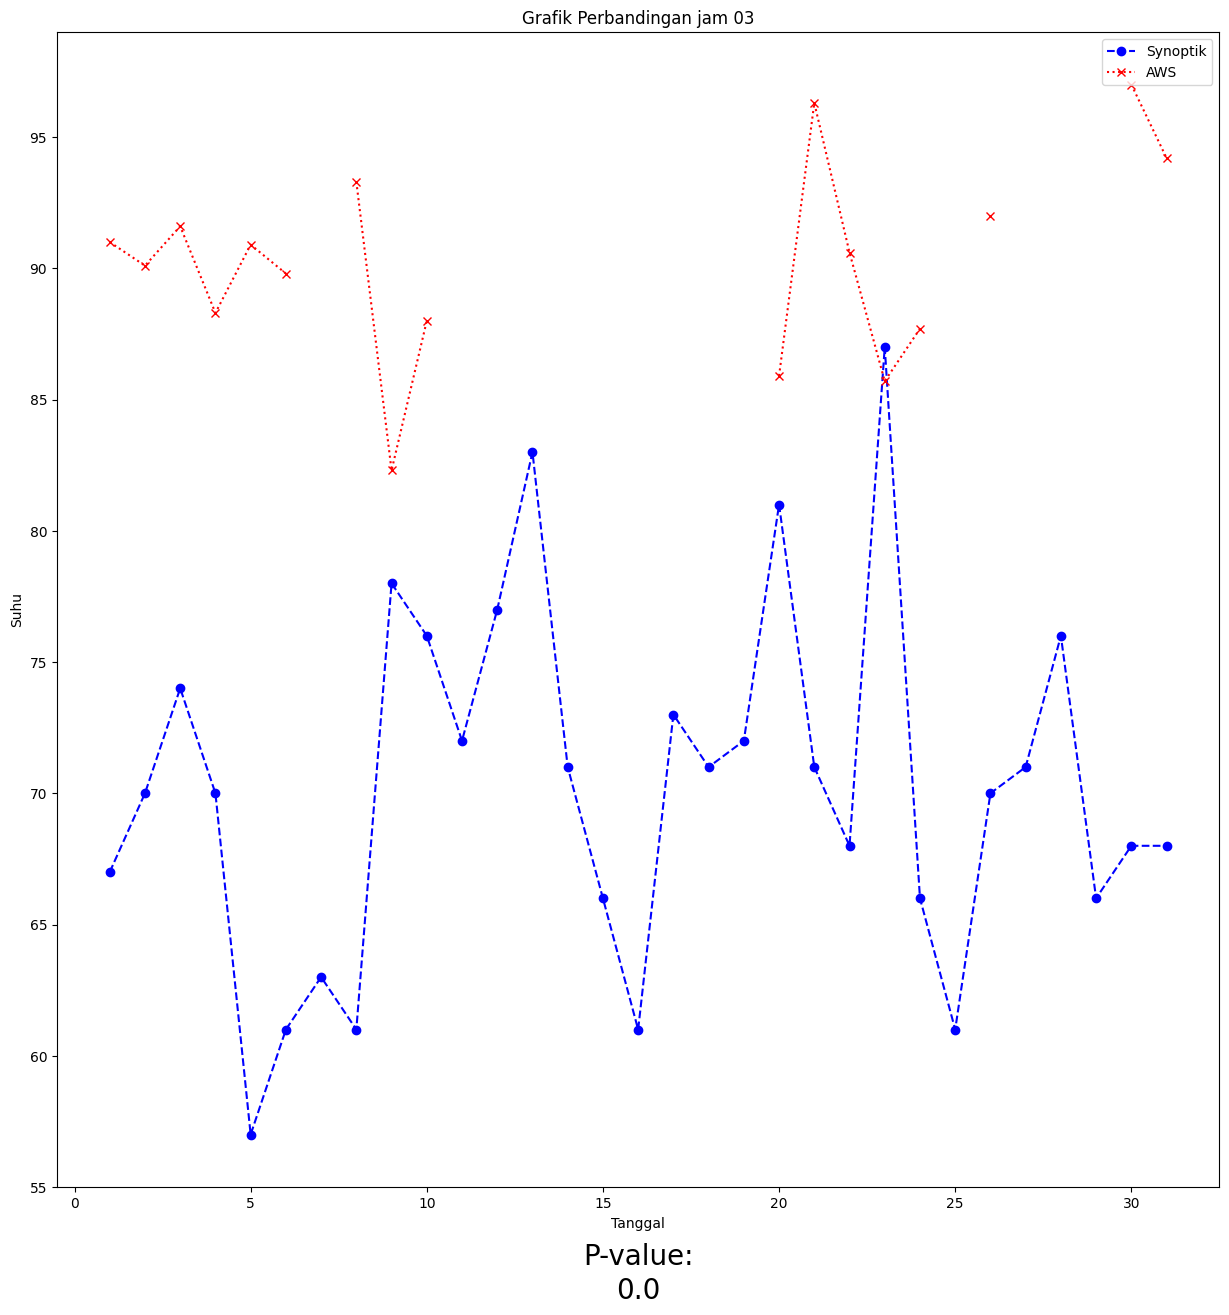

In [8]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['3']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='3', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('3')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['3']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='3', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('3')
    else:
      print("Dilakukan Uji T")
      ujiT('3')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('3')
    else:
      print("Dilakukan Uji T")
      ujiT('3')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 03')
plt.plot(df2_4['Tgl'], df2_4['3'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 4

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 15.906467264902798
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


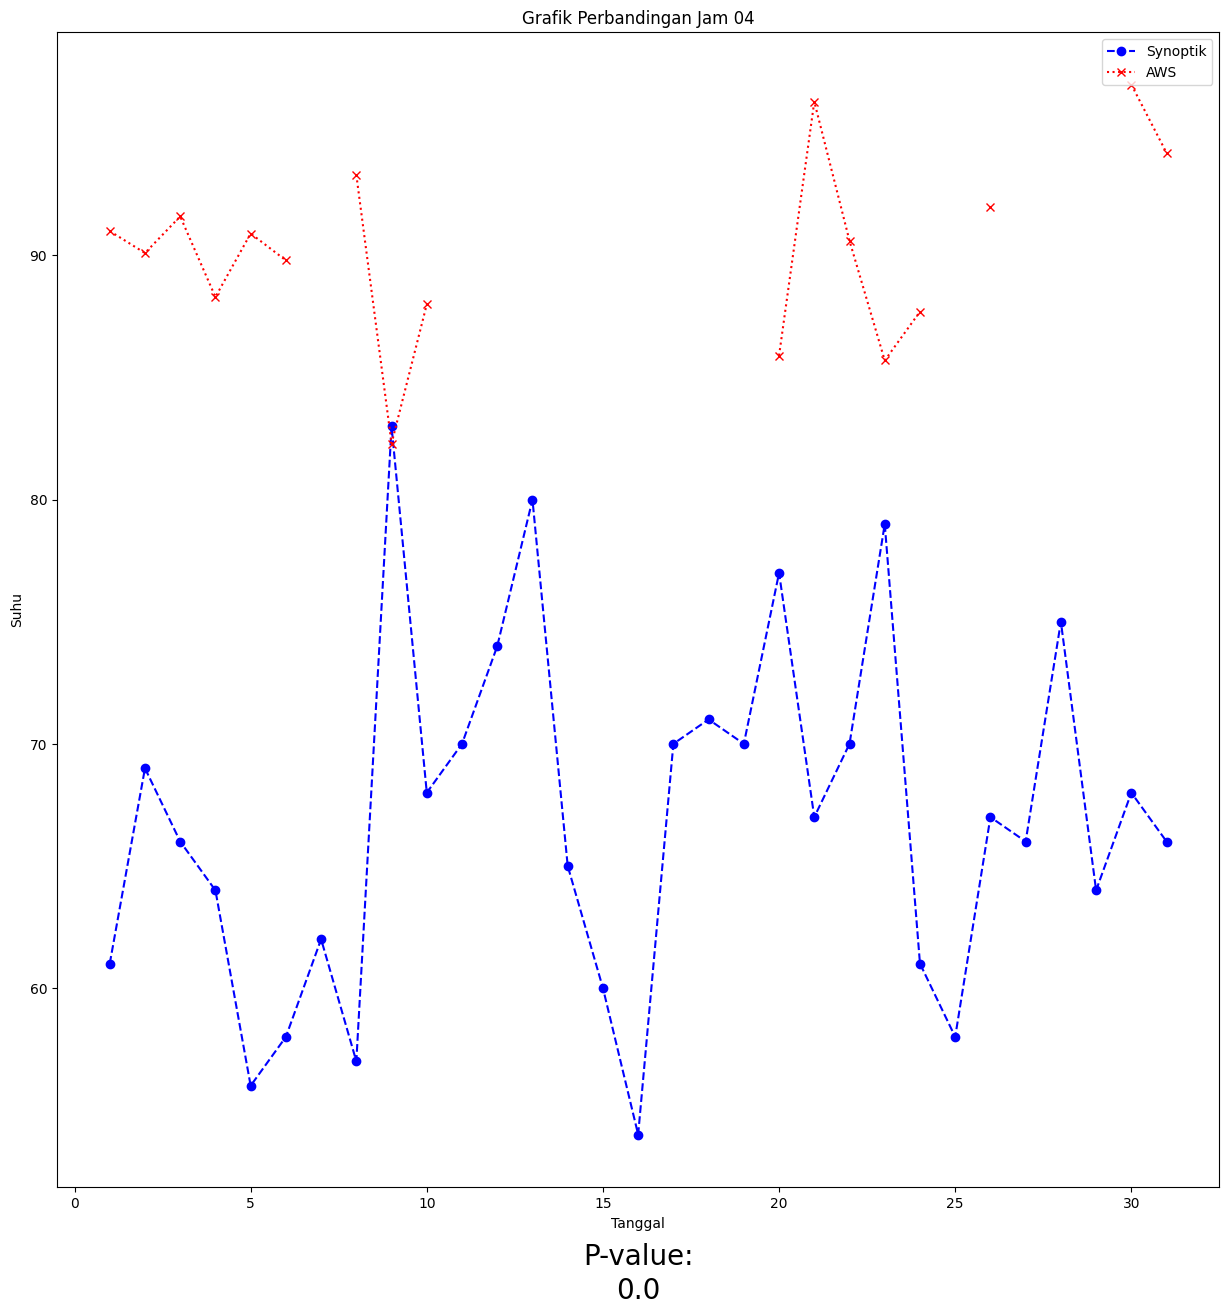

In [9]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['4']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='4', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('4')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['4']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='4', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('4')
    else:
      print("Dilakukan Uji T")
      ujiT('4')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('4')
    else:
      print("Dilakukan Uji T")
      ujiT('4')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 04')
plt.plot(df2_4['Tgl'], df2_4['4'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 5

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 19.66762197470933
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


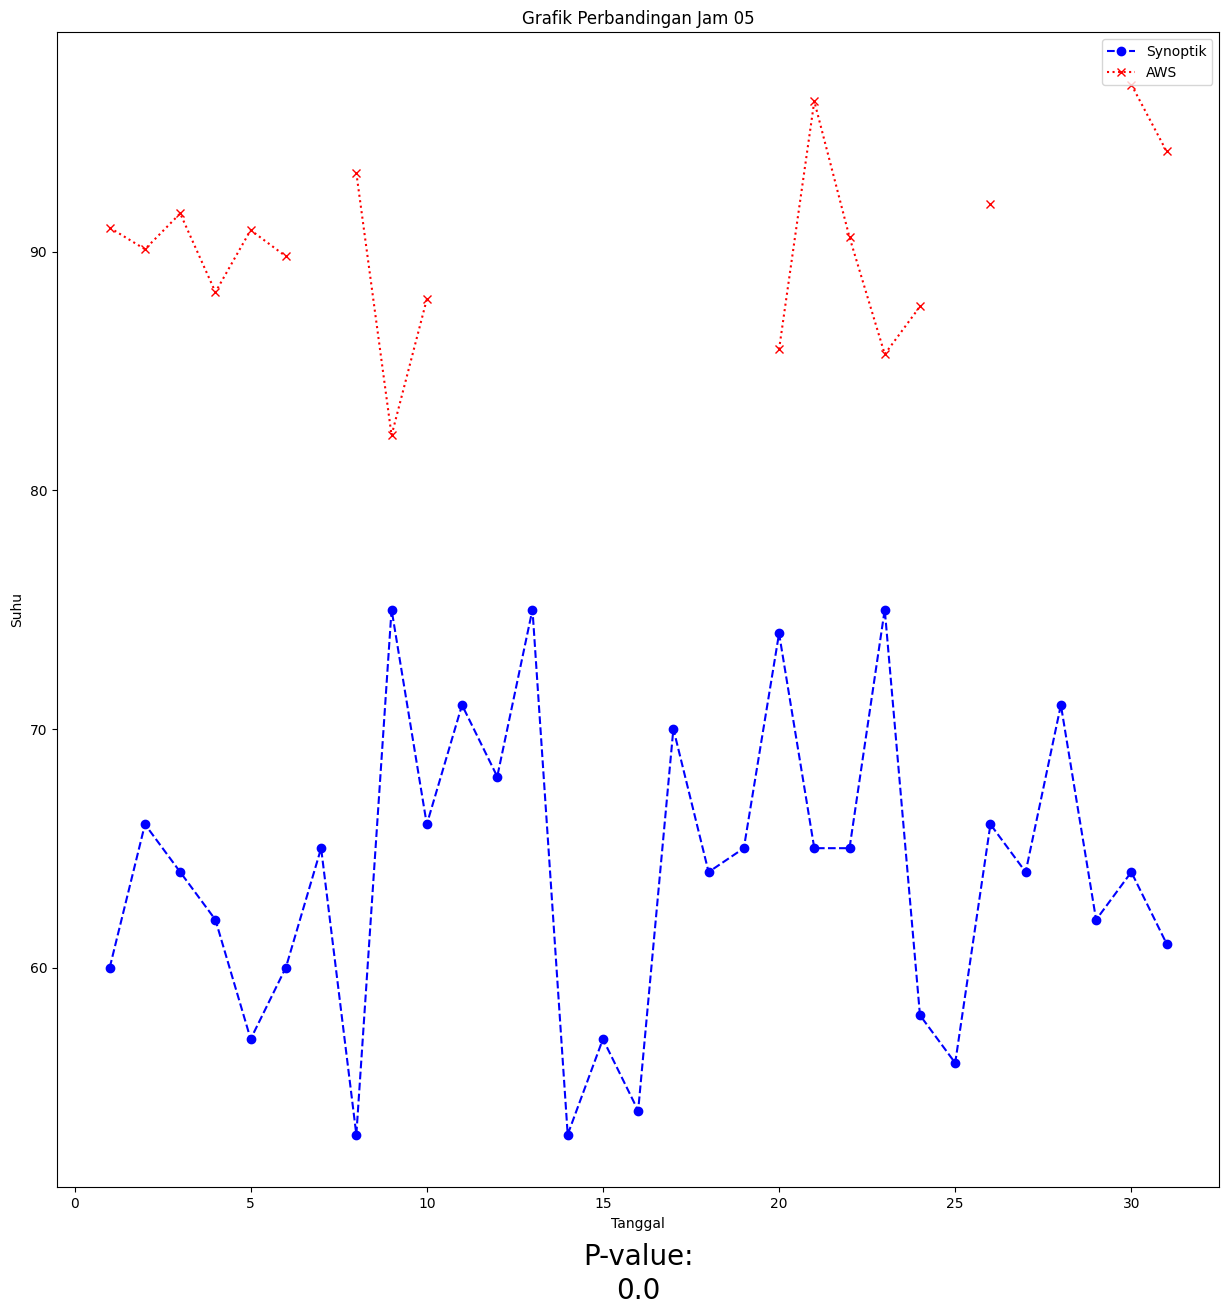

In [10]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['5']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='5', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('5')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['5']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='5', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('5')
    else:
      print("Dilakukan Uji T")
      ujiT('5')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('5')
    else:
      print("Dilakukan Uji T")
      ujiT('5')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 05')
plt.plot(df2_4['Tgl'], df2_4['5'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 6

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 20.06272901403269
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0
p-value for one tailed: 0.0
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


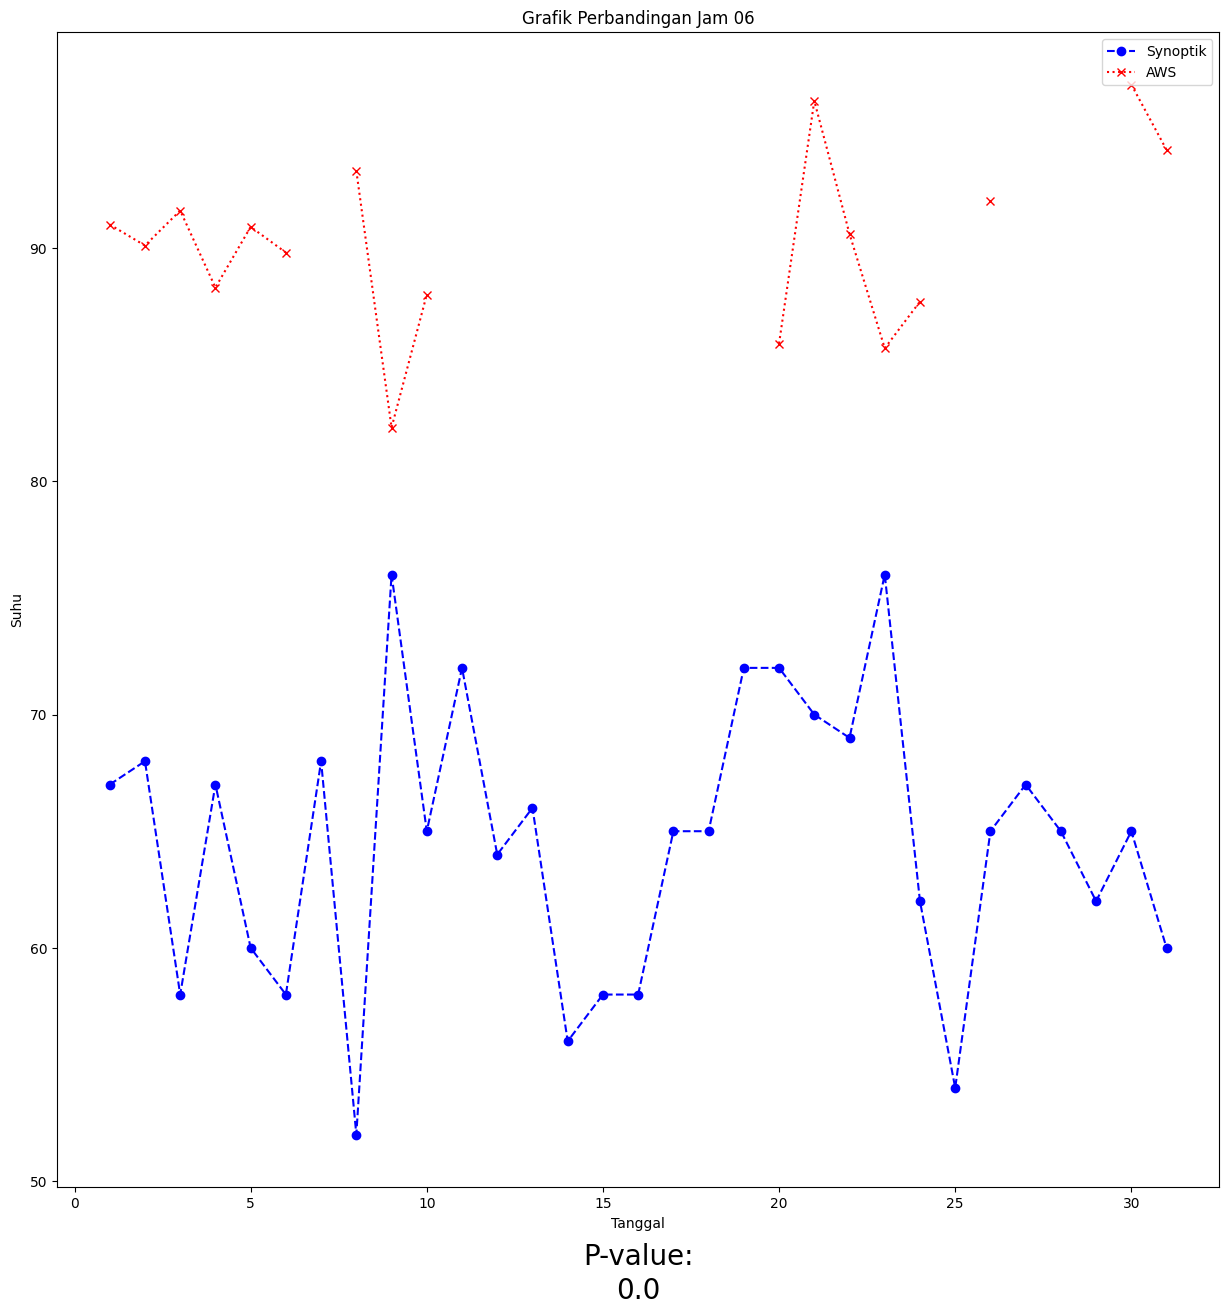

In [11]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['6']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='6', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('6')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['6']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='6', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('6')
    else:
      print("Dilakukan Uji T")
      ujiT('6')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('6')
    else:
      print("Dilakukan Uji T")
      ujiT('6')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 06')
plt.plot(df2_4['Tgl'], df2_4['6'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 7

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=510.00, p=0.00
Terdapat perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\Acer\AppData\Local\Temp\ipykernel_15156\2264744751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['rh_avg'] = df_cleaned_4['rh_avg'].astype(float)


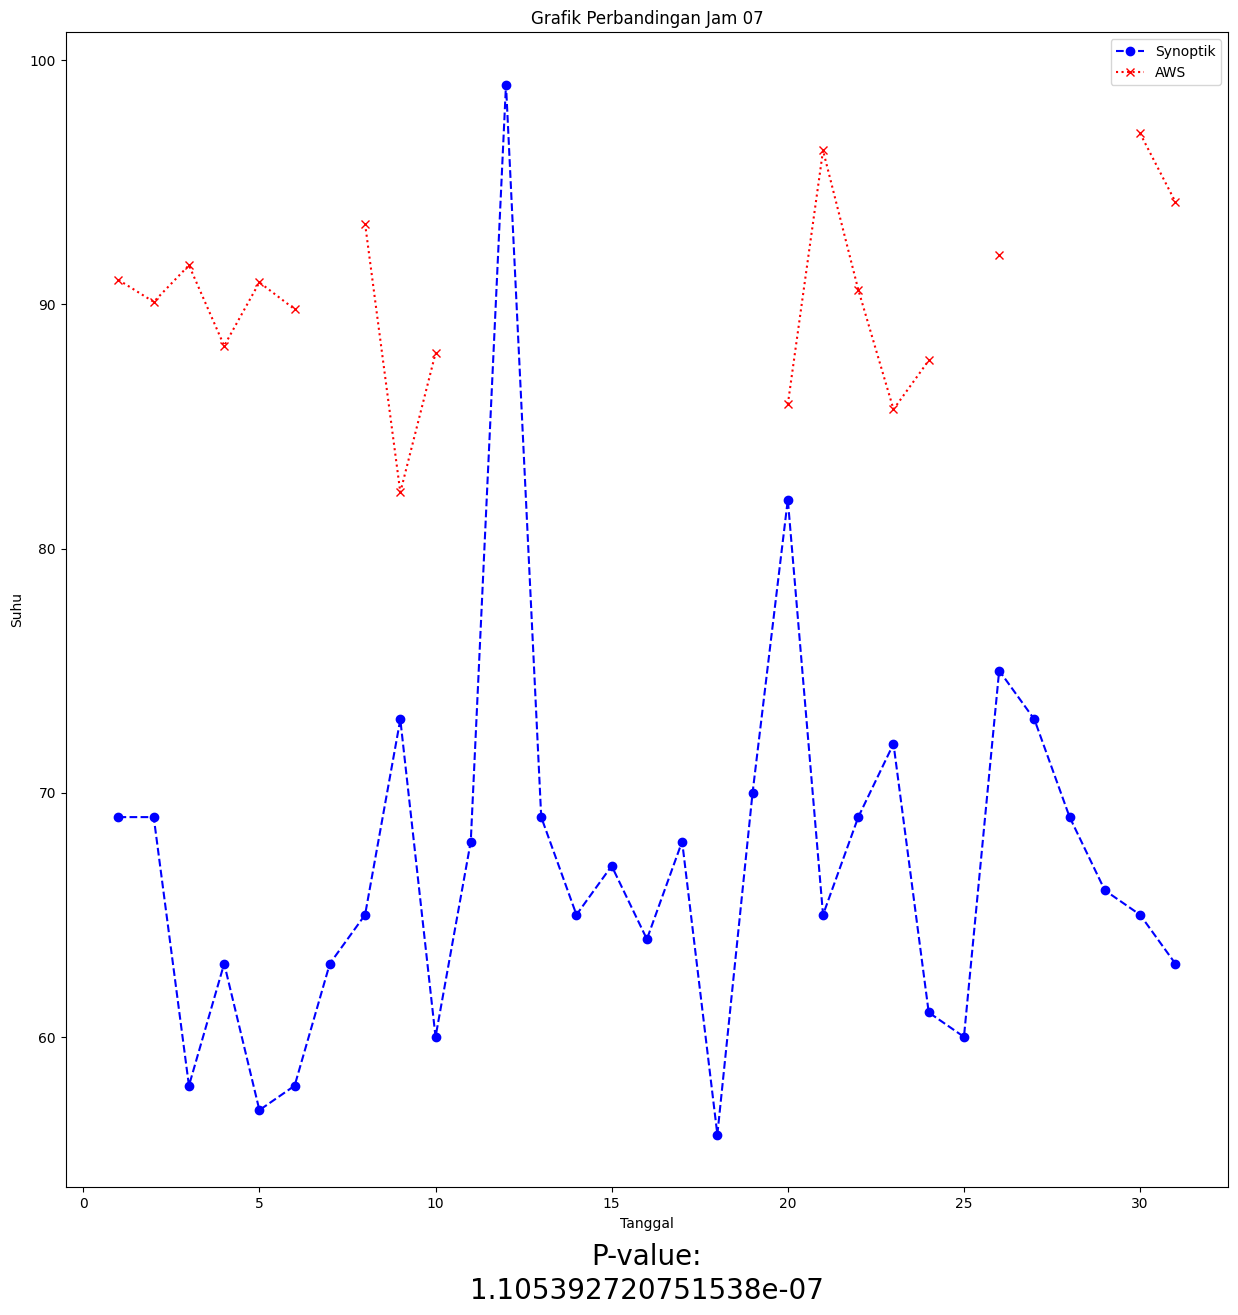

In [12]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['7']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='7', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('7')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['7']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='7', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('7')
    else:
      print("Dilakukan Uji T")
      ujiT('7')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('7')
    else:
      print("Dilakukan Uji T")
      ujiT('7')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 07')
plt.plot(df2_4['Tgl'], df2_4['7'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 8

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=475.00, p=0.00
Terdapat perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\Acer\AppData\Local\Temp\ipykernel_15156\2264744751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['rh_avg'] = df_cleaned_4['rh_avg'].astype(float)


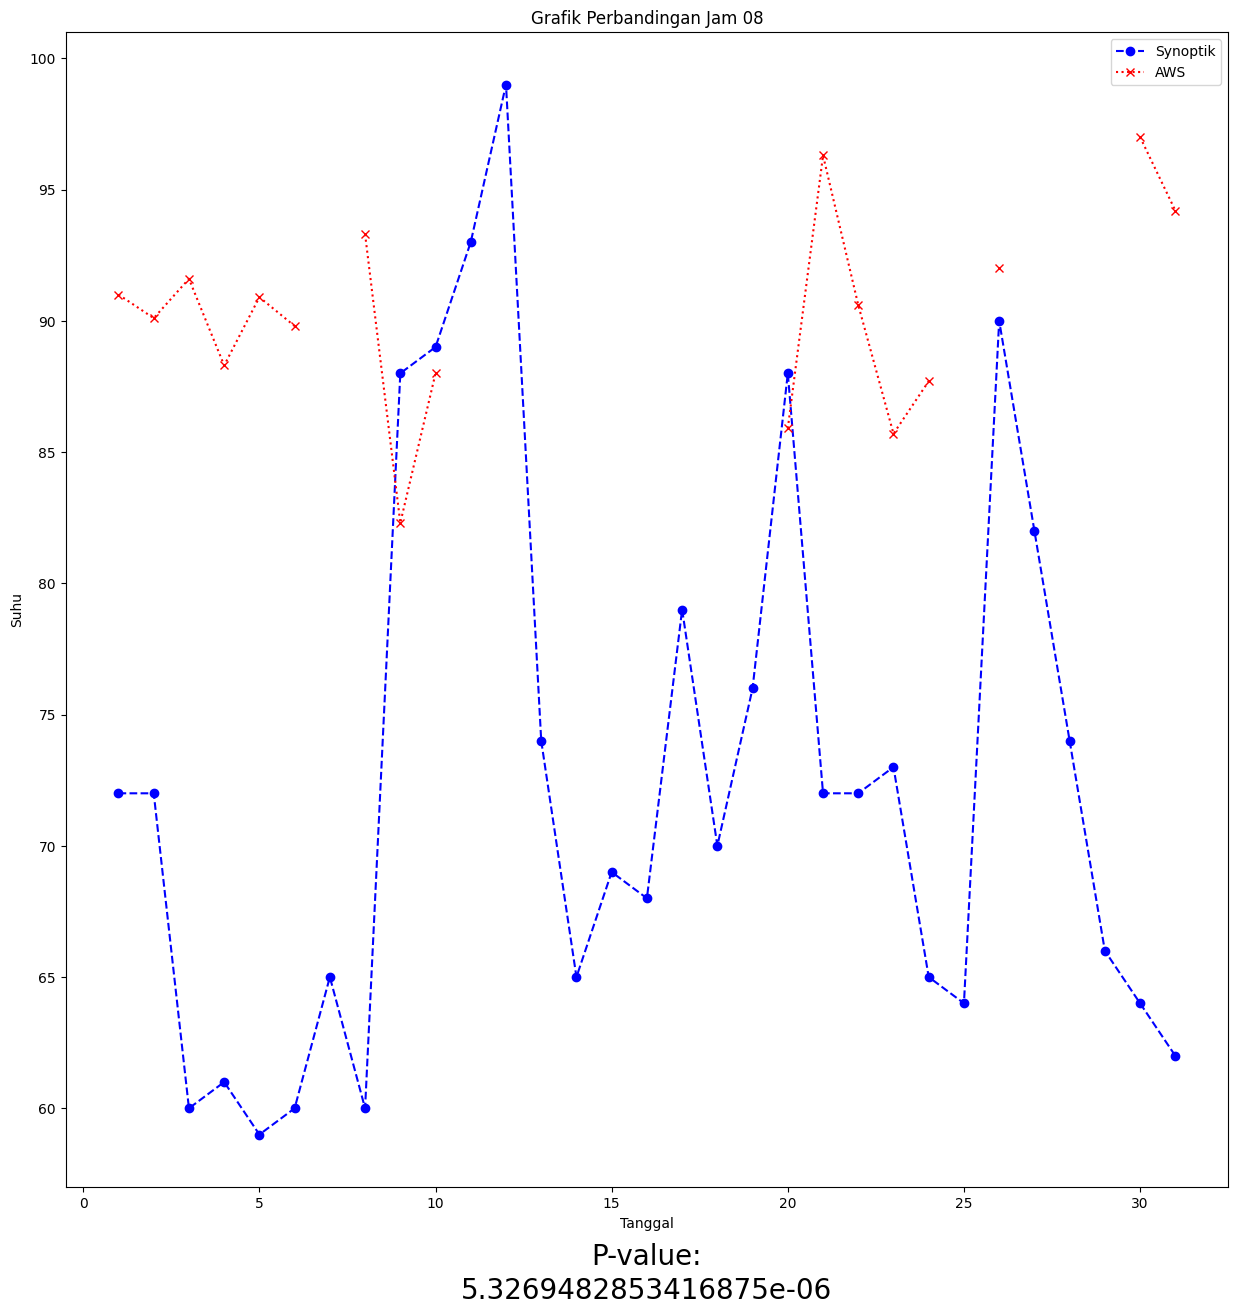

In [13]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['8']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='8', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('8')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['8']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='8', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('8')
    else:
      print("Dilakukan Uji T")
      ujiT('8')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('8')
    else:
      print("Dilakukan Uji T")
      ujiT('8')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 08')
plt.plot(df2_4['Tgl'], df2_4['8'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 9

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 6.890866229151384
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 3.8390024492684915e-09
p-value for one tailed: 1.9195012246342458e-09
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


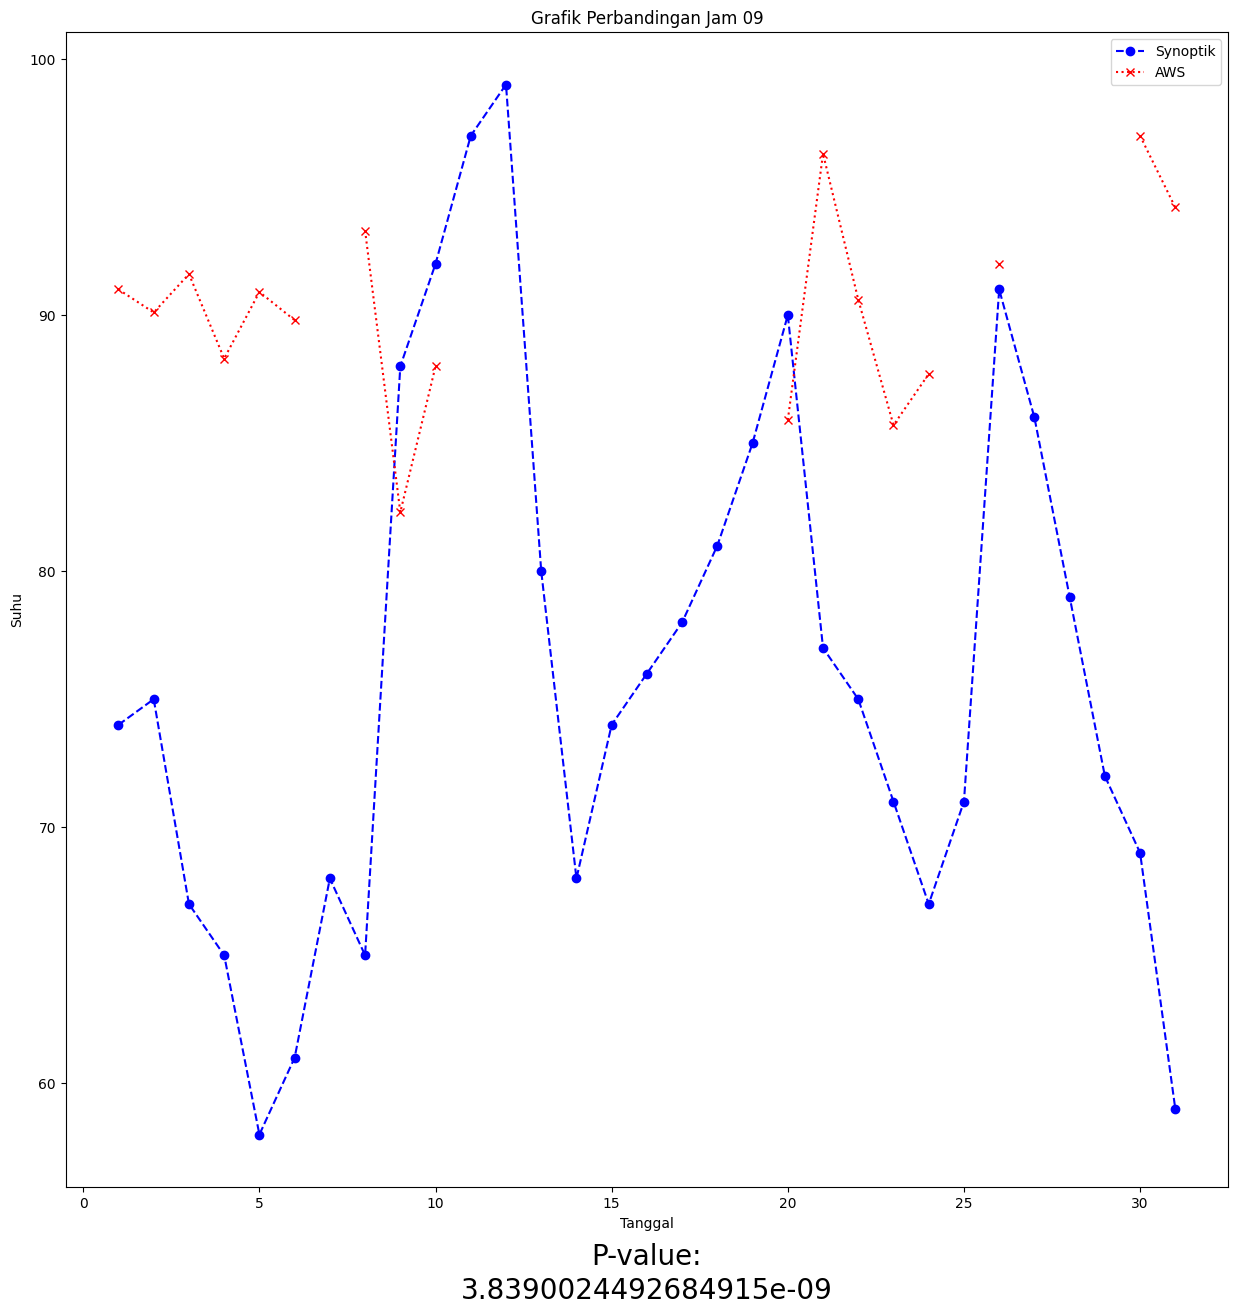

In [14]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['9']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='9', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('9')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['9']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='9', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('9')
    else:
      print("Dilakukan Uji T")
      ujiT('9')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('9')
    else:
      print("Dilakukan Uji T")
      ujiT('9')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 09')
plt.plot(df2_4['Tgl'], df2_4['9'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 10

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 5.97706120542148
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 1.3419674993464525e-07
p-value for one tailed: 6.709837496732263e-08
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


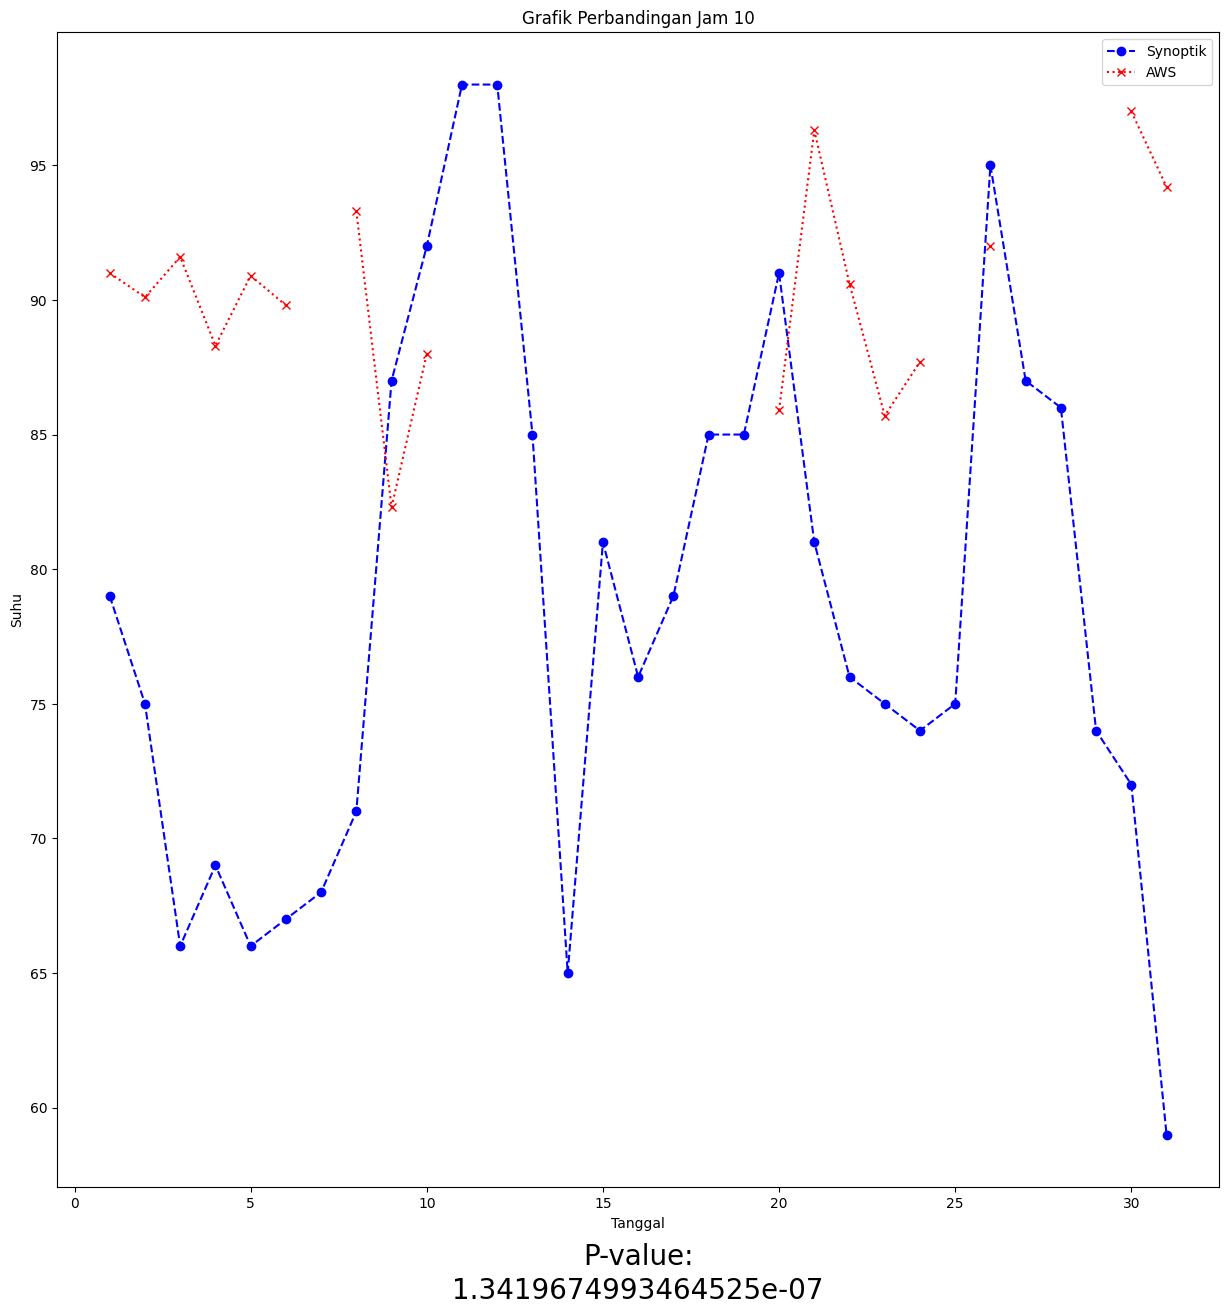

In [15]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['10']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='10', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('10')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['10']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='10', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 10')
plt.plot(df2_4['Tgl'], df2_4['10'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 11

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 4.904980183591516
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 7.476828834063198e-06
p-value for one tailed: 3.738414417031599e-06
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


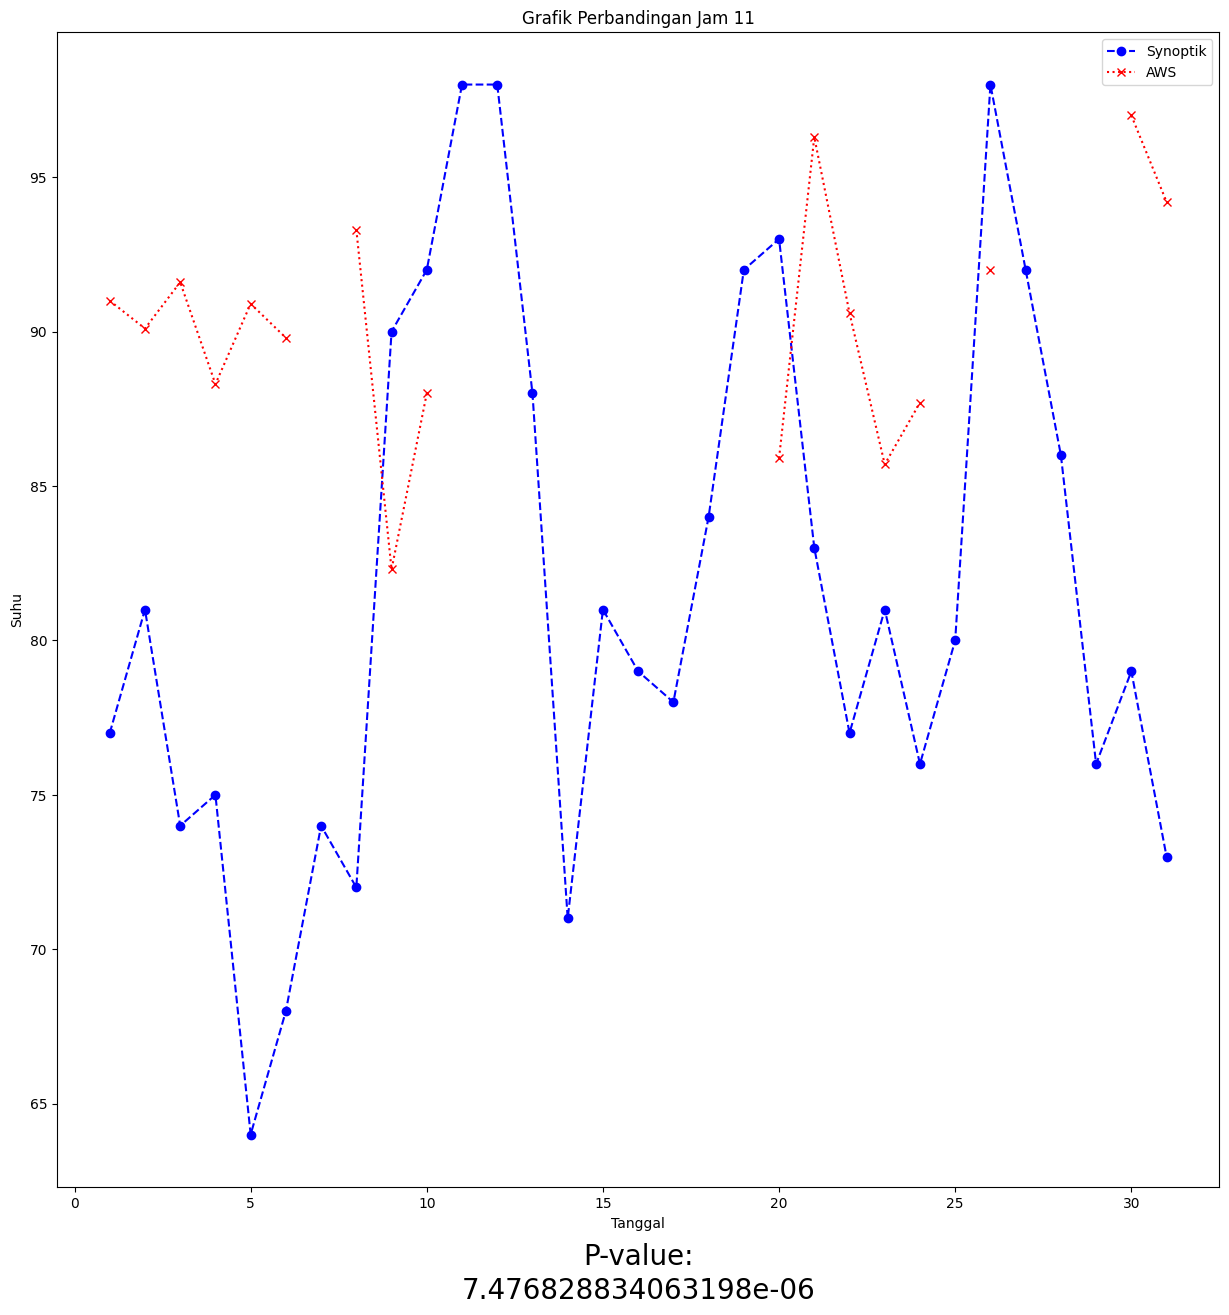

In [16]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['11']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='11', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('11')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['11']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='11', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 11')
plt.plot(df2_4['Tgl'], df2_4['11'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 12

Indeks baris yang berisi NaN:
Index([6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 3.845424321372427
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.0002936400269544226
p-value for one tailed: 0.0001468200134772113
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


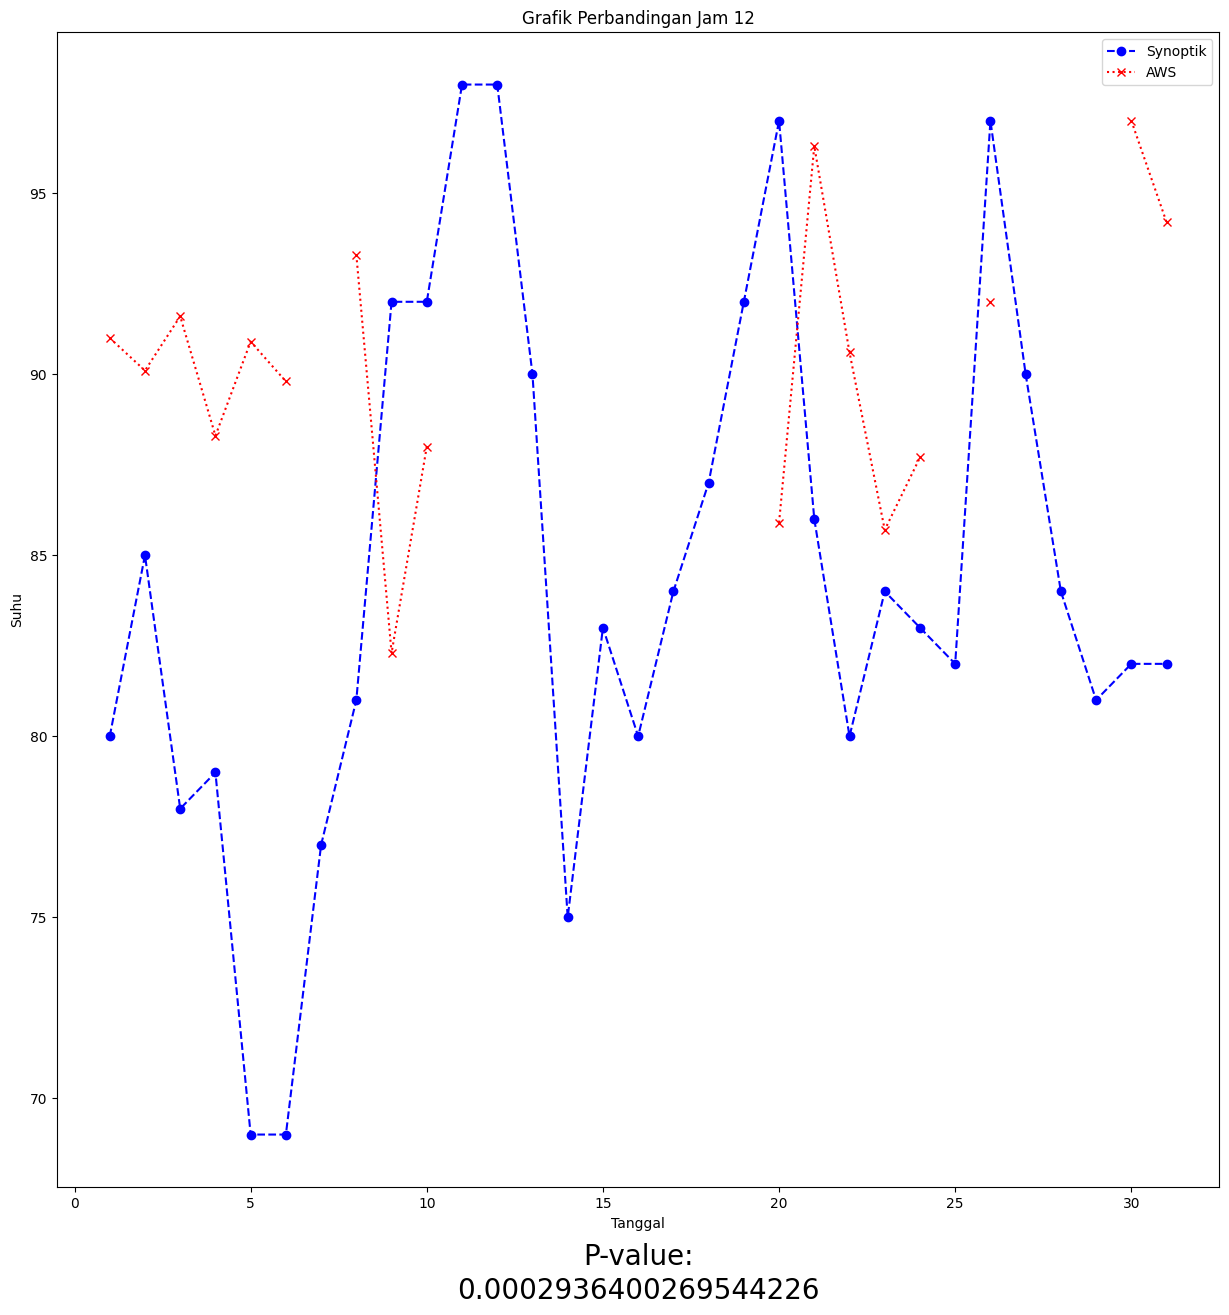

In [17]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = dp.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == dp.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['rh_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = dp.DataFrame({'rh_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['12']
df2_4 = dp.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='12', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='rh_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
#AWS
df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('12')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['12']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='12', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['rh_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='rh_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['rh_avg'] = df_sorted1_4['rh_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['rh_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['rh_avg']=df1_4['rh_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 12')
plt.plot(df2_4['Tgl'], df2_4['12'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['rh_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()